# Titanic

In [1]:
data = 'https://drive.google.com/drive/folders/1AUq-ZUWuY3IkzBd5Yj02BGtXEll6kVZU?usp=drive_link'

In [2]:
import pandas as pd

In [3]:
df1=pd.read_csv('ttrain.csv')

In [4]:
df2=pd.read_csv('ttest.csv')

In [5]:
df=pd.concat([df1,df2])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [7]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [8]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


In [9]:
import matplotlib.pyplot as plt

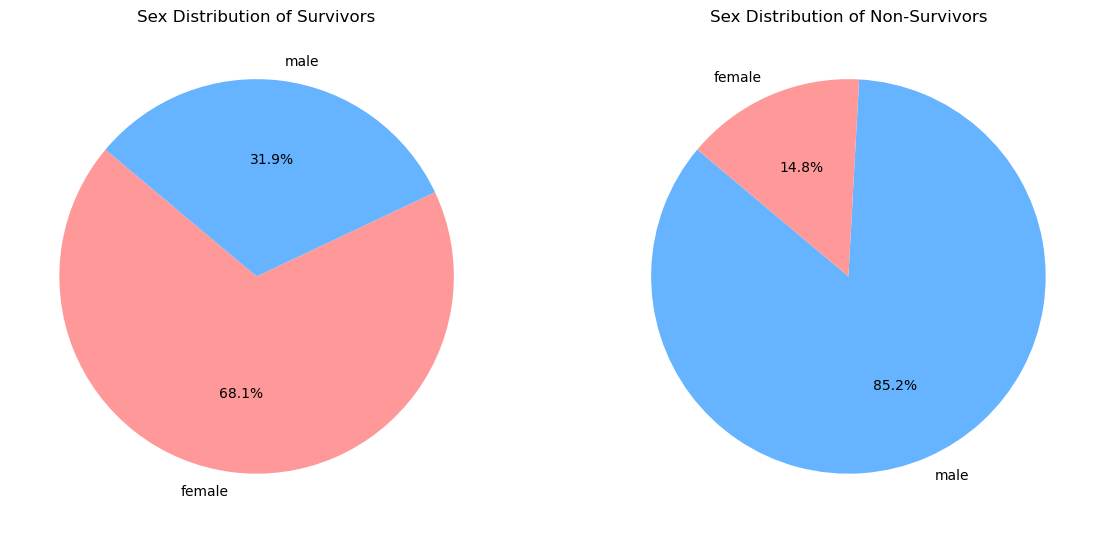

In [10]:
survived_sex_distribution = df[df['Survived'] == 1]['Sex'].value_counts()

not_survived_sex_distribution = df[df['Survived'] == 0]['Sex'].value_counts()

 

labels_survived = survived_sex_distribution.index

sizes_survived = survived_sex_distribution.values

 

labels_not_survived = not_survived_sex_distribution.index

sizes_not_survived = not_survived_sex_distribution.values

 

 

colors = ['#ff9999', '#66b3ff']

 

 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

 

 

ax1.pie(sizes_survived, labels=labels_survived, autopct='%1.1f%%', colors=colors, startangle=140)

ax1.set_title('Sex Distribution of Survivors')

colors = ['#66b3ff','#ff9999']

 

ax2.pie(sizes_not_survived, labels=labels_not_survived, autopct='%1.1f%%', colors=colors, startangle=140)

ax2.set_title('Sex Distribution of Non-Survivors')

 

plt.show()

plt.show()

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df['Fare'].value_counts() #hangi veiden ne kadar var onu gösterdi

Fare
8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
7.7417      1
8.1583      1
8.4583      1
7.8000      1
7.7208      1
Name: count, Length: 281, dtype: int64

In [13]:
df['Fare']=df['Fare'].fillna(df['Fare'].mean)

In [14]:
df['Embarked'].value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [15]:
df.shape

(1309, 12)

In [16]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [17]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [18]:
del df['Cabin']

In [19]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [20]:
df['Title']=df['Name'].str.extract('([A-Za-z]+)\.', expand=False)

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
/var/folders/rb/zyhvmlnd50x10mm5dt_6l4sm0000gn/T/ipykernel_3112/1906848022.py:1: SyntaxWarning: invalid escape sequence '\.'
  df['Title']=df['Name'].str.extract('([A-Za-z]+)\.', expand=False)


In [21]:
df['Title'].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [22]:
df['Title']= df['Title'].replace(['Rev','Dr','Col','Major','Sir','Don','Capt','Jonkheer'],'Mr')

In [23]:
df['Title']= df['Title'].replace(['Lady','Countess','Dona','Mme'],'Mrs')

In [24]:
df['Title'].value_counts()

Title
Mr        783
Miss      260
Mrs       201
Master     61
Ms          2
Mlle        2
Name: count, dtype: int64

In [25]:
df['Age']=df['Age'].fillna(df.groupby('Title')['Age'].transform('mean'))  ## 

In [26]:
del df['Name']

In [27]:
del df['Ticket']

In [28]:
del df['Embarked']

In [29]:
df=pd.get_dummies(df,drop_first=True)

In [30]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Sex_male,Fare_71.2833,Fare_7.925,Fare_53.1,...,Fare_12.7375,Fare_45.5,Fare_7.575,Fare_7.5792,Fare_7.7208,Title_Miss,Title_Mlle,Title_Mr,Title_Mrs,Title_Ms
0,1,0.0,3,22.0,1,0,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,2,1.0,1,38.0,1,0,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,3,1.0,3,26.0,0,0,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,4,1.0,1,35.0,1,0,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,5,0.0,3,35.0,0,0,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [79]:
train=df[:891]
test=df[891:]
# veriyi ayırdım

In [81]:
x=train.drop(['Survived','PassengerId'],axis=1)

In [83]:
y=train[['Survived']]

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [87]:
r=RandomForestClassifier()
g=GradientBoostingClassifier()

In [95]:
x.head()

,Pclass,Age,SibSp,Parch,Sex_male,Fare_71.2833,Fare_7.925,Fare_53.1,Fare_8.05,Fare_8.4583,...,Fare_12.7375,Fare_45.5,Fare_7.575,Fare_7.5792,Fare_7.7208,Title_Miss,Title_Mlle,Title_Mr,Title_Mrs,Title_Ms
0,3,22.0,1,0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,1,38.0,1,0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,3,26.0,0,0,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,1,35.0,1,0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
4,3,35.0,0,0,True,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [97]:
y.head()

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0


In [89]:
r.fit(x,y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [91]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Sex_male,Fare_71.2833,Fare_7.925,Fare_53.1,...,Fare_12.7375,Fare_45.5,Fare_7.575,Fare_7.5792,Fare_7.7208,Title_Miss,Title_Mlle,Title_Mr,Title_Mrs,Title_Ms
0,1,0.0,3,22.0,1,0,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,2,1.0,1,38.0,1,0,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,3,1.0,3,26.0,0,0,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,4,1.0,1,35.0,1,0,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,5,0.0,3,35.0,0,0,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [93]:
test=test.drop(['PassengerId','Survived'],axis=1)

In [99]:
r.predict(test)

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 0.

In [105]:
tahmin=r.predict(test)

In [107]:
sonuc=pd.DataFrame()

In [109]:
sonuc['Survived']=tahmin

In [111]:
sonuc['PassengerId']=df2['PassengerId']

In [117]:
sonuc['Survived']=sonuc['Survived'].astype('int32')

In [119]:
sonuc

,Survived,PassengerId
0,0,892
1,0,893
2,0,894
3,1,895
4,0,896
...,...,...
413,0,1305
414,1,1306
415,0,1307
416,0,1308


In [121]:
sonuc.to_csv('sonuc1.csv',index=False)